In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('eurostat/Wastewater_generation_and_discharge_by_RBD.csv')
df.drop("Flag and Footnotes", axis = 1, inplace = True)

df = df.drop(df.index[(df.SUBSTANCE == "Volume") & (df.UNIT == "Tonnes of O2 per day")])
df.SUBSTANCE.unique()

array(['Volume', 'Biochemical oxygen demand (BOD)', 'Nitrogen (N-tot )'],
      dtype=object)

In [2]:
df.head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
0,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Volume,Tonnes per day,:
2,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Volume,Million cubic metres,58.58
3,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes per day,:
4,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes of O2 per day,57.78
5,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Million cubic metres,:


In [3]:
df.loc[df.Value == ':', 'Value'] = np.NaN
df = df.dropna()
df.Value = df.Value.astype('float');

In [4]:
df.head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
2,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Volume,Million cubic metres,58.58
4,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes of O2 per day,57.78
6,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Nitrogen (N-tot ),Tonnes per day,10.59
11,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Volume,Million cubic metres,0.00
13,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Biochemical oxygen demand (BOD),Tonnes of O2 per day,0.00


In [5]:
df.loc[(df.RBD == 'Scheldt/Escaut - RBD (BE-Brussels)') & (df.TIME == 2000) & (df.Value != 0), ['SUBSTANCE', 'Value', "UNIT"]]

,SUBSTANCE,Value,UNIT
2,Volume,58.58,Million cubic metres
4,Biochemical oxygen demand (BOD),57.78,Tonnes of O2 per day
6,Nitrogen (N-tot ),10.59,Tonnes per day
56,Volume,5.45,Million cubic metres
58,Biochemical oxygen demand (BOD),5.37,Tonnes of O2 per day
60,Nitrogen (N-tot ),1.00,Tonnes per day
65,Volume,51.96,Million cubic metres
67,Biochemical oxygen demand (BOD),51.25,Tonnes of O2 per day
69,Nitrogen (N-tot ),9.49,Tonnes per day
78,Nitrogen (N-tot ),0.32,Tonnes per day


In [6]:
df.loc[ (df.SUBSTANCE == 'Volume') & (df.Value != 0)].groupby("RBD").Value.count().sort_values(ascending = False)

RBD
West Aegean - RBD (BG)                        168
Black Sea - RBD                               168
Danube - RBD (BG)                             168
East Aegean - RBD (BG)                        168
Danube (RS)                                   141
Morava (RS)                                   141
Sava (RS)                                     140
Danube - RBD (SI)                             124
North Adriatic - RBD                          107
Latvia                                        100
Venta - RBD (LV)                               99
Daugava - RBD (LV)                             99
Lielupe - RBD (LV)                             98
Schelde/Escaut - RBD (BE-Flemish region)       96
Danube - RBD (RO)                              95
Scheldt/Escaut - RBD (BE-Brussels)             88
Gauja (Koiva) - RBD (LV)                       84
Croatia                                        75
Labe / Elbe - RBD (CZ)                         72
Morava / March (CZ)                           

Serbien (SR) und Bulgarien (BG) monitorn ihre Wastewater generation am stärksten

In [7]:
dg = df.loc[df.SUBSTANCE == "Volume"].groupby(["TIME", "RBD"]).Value.mean()
dg.head(20)

TIME  RBD                                       
2000  Adige - RBD                                      0.870000
      Black Sea - RBD                                 56.272500
      Bulgaria                                       311.593333
      Croatia                                        374.333333
      Danube (RS)                                     96.894000
      Danube - RBD (BG)                              138.303333
      Danube - RBD (CH)                                8.850000
      Danube - RBD (RO)                             1730.871429
      Danube - RBD (SI)                               44.865000
      Daugava - RBD (LV)                              73.677000
      East Aegean - RBD (BG)                          91.228333
      Former Yugoslav Republic of Macedonia, the     103.733333
      Gauja (Koiva) - RBD (LV)                         8.831000
      Latvia                                         101.777000
      Lielupe - RBD (LV)                               

In [8]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2000, 2014),dg[dg.index.get_level_values('RBD') == 'Black Sea - RBD'])
plt.legend('Black Sea - RBD')
plt.show()

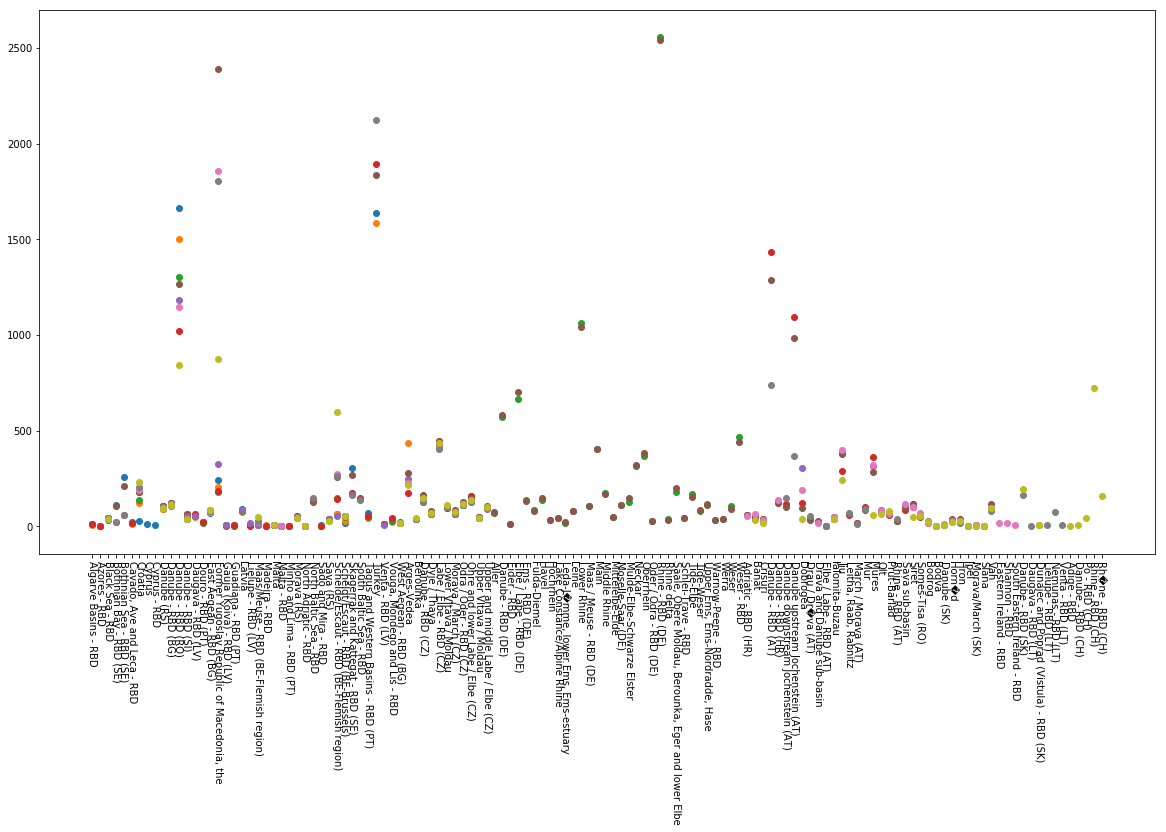

In [9]:
plt.figure(figsize = (20,10))
for i in range(2005, 2014):
    plt.scatter(dg[dg.index.get_level_values('TIME') == i].index.get_level_values('RBD'), dg[dg.index.get_level_values('TIME') == i])
    plt.xticks(rotation=-90)


plt.show()

In [10]:
df.loc[(df.SUBSTANCE != "Volume")].SUBSTANCE.value_counts()

Biochemical oxygen demand (BOD)    3262
Nitrogen (N-tot )                  3145
Name: SUBSTANCE, dtype: int64

In [11]:
df.loc[(df.SUBSTANCE == 'Biochemical oxygen demand (BOD)')].head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
4,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Biochemical oxygen demand (BOD),Tonnes of O2 per day,57.78
13,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Biochemical oxygen demand (BOD),Tonnes of O2 per day,0.00
31,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - mining and quarrying,Biochemical oxygen demand (BOD),Tonnes of O2 per day,0.00
58,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - services,Biochemical oxygen demand (BOD),Tonnes of O2 per day,5.37
67,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - private households,Biochemical oxygen demand (BOD),Tonnes of O2 per day,51.25


**Biochemical oxygen demand (BOD)** shows the level of poultion of the water, high value -> high poultion

In [12]:
df.loc[(df.SUBSTANCE == 'Nitrogen (N-tot )')].head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
6,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - point sources - total,Nitrogen (N-tot ),Tonnes per day,10.59
15,2000,Scheldt/Escaut - RBD (BE-Brussels),"Generation of wastewater - agriculture, forest...",Nitrogen (N-tot ),Tonnes per day,0.00
33,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - mining and quarrying,Nitrogen (N-tot ),Tonnes per day,0.00
60,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - services,Nitrogen (N-tot ),Tonnes per day,1.00
69,2000,Scheldt/Escaut - RBD (BE-Brussels),Generation of wastewater - private households,Nitrogen (N-tot ),Tonnes per day,9.49


Nitrogen shows level of polution.

In [13]:
dh = df.loc[df.SUBSTANCE == 'Nitrogen (N-tot )'].groupby(["TIME", "RBD"]).Value.mean()
dk = df.loc[df.SUBSTANCE == 'Biochemical oxygen demand (BOD)'].groupby(["TIME", "RBD"]).mean()

print(dk.head(20))
print(dh.head(20))
# plt.plot(np.arange(2005, 2014),dg[dg.index.get_level_values('RBD') == 'Black Sea - RBD'])

                                                   Value
TIME RBD                                                
2000 Danube - RBD (RO)                         49.285714
     Danube - RBD (SI)                         21.777500
     Daugava - RBD (LV)                         1.742000
     Gauja (Koiva) - RBD (LV)                   0.435000
     Latvia                                     2.854000
     Lielupe - RBD (LV)                         0.379000
     Maas/Meuse - RBD (BE-Flemish region)       1.255000
     Malta                                      0.000000
     Malta - RBD                                0.000000
     North Adriatic - RBD                       1.257500
     Romania                                   49.285714
     Schelde/Escaut - RBD (BE-Flemish region)  20.012500
     Scheldt/Escaut - RBD (BE-Brussels)        24.216667
     Slovenia                                  23.035000
     Venta - RBD (LV)                           0.298000
2001 Danube - RBD (RO)         

In [14]:
w = dk[dk.index.get_level_values('RBD') == 'Elbe / Labe - RBD (DE)']
v = dh[dh.index.get_level_values('RBD') == 'Lower Rhine']

In [15]:
print(dk[dk.index.get_level_values('RBD') == 'Danube - RBD (RO)'])
print(dh[dh.index.get_level_values('RBD') == 'Danube - RBD (RO)'])

dh.loc[2004,'Danube - RBD (RO)'] = dh[2003,'Danube - RBD (RO)']

                             Value
TIME RBD                          
2000 Danube - RBD (RO)   49.285714
2001 Danube - RBD (RO)   44.771429
2002 Danube - RBD (RO)   52.228571
2003 Danube - RBD (RO)   65.633333
2005 Danube - RBD (RO)  127.728571
2006 Danube - RBD (RO)  254.275000
2007 Danube - RBD (RO)  264.457143
2008 Danube - RBD (RO)   22.447500
2009 Danube - RBD (RO)   26.558571
2010 Danube - RBD (RO)   29.551429
2011 Danube - RBD (RO)   26.281250
2012 Danube - RBD (RO)   69.462700
2013 Danube - RBD (RO)  114.230909
TIME  RBD              
2000  Danube - RBD (RO)    17.157143
2001  Danube - RBD (RO)    12.857143
2002  Danube - RBD (RO)    16.542857
2003  Danube - RBD (RO)    18.033333
2005  Danube - RBD (RO)    27.700000
2006  Danube - RBD (RO)    27.066667
2008  Danube - RBD (RO)     8.718750
2009  Danube - RBD (RO)    10.944286
2010  Danube - RBD (RO)    12.257143
2011  Danube - RBD (RO)     1.601250
2012  Danube - RBD (RO)    18.837233
2013  Danube - RBD (RO)    31.159091
Name: V

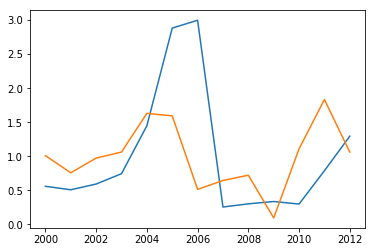

In [16]:
plt.plot(np.arange(2000,2013), dk[dk.index.get_level_values('RBD') == 'Danube - RBD (RO)']/dk[dk.index.get_level_values('RBD') == 'Danube - RBD (RO)'].mean())
plt.plot(np.arange(2000,2013), dh[dh.index.get_level_values('RBD') == 'Danube - RBD (RO)']/dh[dh.index.get_level_values('RBD') == 'Danube - RBD (RO)'].mean())
plt.show()

In [17]:
print(dk[dk.index.get_level_values('RBD').str.contains('Danube')].count())

Value    61
dtype: int64


In [18]:
print(dk[dk.index.get_level_values('RBD').str.contains('Rhine')].count())

Value    14
dtype: int64


# New Approach without mean()

In [19]:
df.loc[df.RBD == 'Danube (RS)', 'RBD'] = 'Danube - RBD (RS)'
df_dan = df[df.RBD.str.contains("Danube - RBD")]
df_dan.head()

,TIME,RBD,WW_GTD,SUBSTANCE,UNIT,Value
470,2000,Danube - RBD (BG),Generation of wastewater - point sources - total,Volume,Million cubic metres,271.65
479,2000,Danube - RBD (BG),"Generation of wastewater - agriculture, forest...",Volume,Million cubic metres,2.66
488,2000,Danube - RBD (BG),Generation of wastewater - industry total,Volume,Million cubic metres,117.18
497,2000,Danube - RBD (BG),Generation of wastewater - mining and quarrying,Volume,Million cubic metres,7.53
506,2000,Danube - RBD (BG),Generation of wastewater - manufacturing indus...,Volume,Million cubic metres,88.79


In [20]:
df_dan.RBD.unique()

array(['Danube - RBD (BG)', 'Danube - RBD (RO)', 'Danube - RBD (SI)',
       'Danube - RBD (CH)', 'Danube - RBD (RS)', 'Danube - RBD (CZ)',
       'Danube - RBD (DE)', 'Danube - RBD (HR)', 'Danube - RBD (AT)',
       'Danube - RBD (SK)'], dtype=object)

In [30]:
import re

for item in df_dan.RBD.unique():
    z = re.search('[(]([A-Z]+)[)]', item).group(0)
    z = re.search('([A-Z]+)', z).group(0)
    vars()['df_'+z] = df_dan[(df_dan.RBD.str.contains(z))]
    vars()['df_'+z] = vars()['df_'+z].set_index(np.arange(len(vars()['df_'+z].index)))
    vars()['df_'+z].TIME = vars()['df_'+z].TIME.astype(int) 

In [31]:
df_RS['SUBSTANCE'].unique()

array(['Volume'], dtype=object)

## Country names:

BG = Bulgaria;
RO = Romania;
SI = Slovenia;
CH = Switzerland; 
RS = Serbia;
CZ = Czech Republic;
DE = Germany;
HR = Croatia;
AT = Austria;
SK = Slovakia;

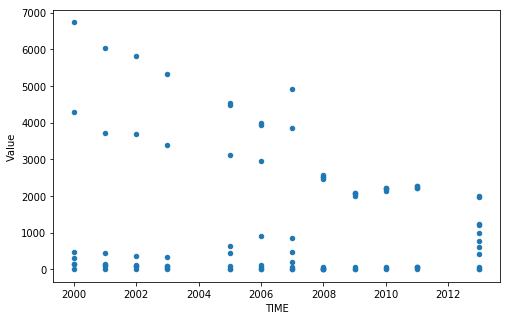

In [32]:
df_RO.TIME = df_RO.TIME.astype(float)
df_RO.Value = df_RO.Value.astype(float)
df_RO.loc[df_RO.SUBSTANCE == "Volume"].plot.scatter('TIME', 'Value', figsize = (8,5))

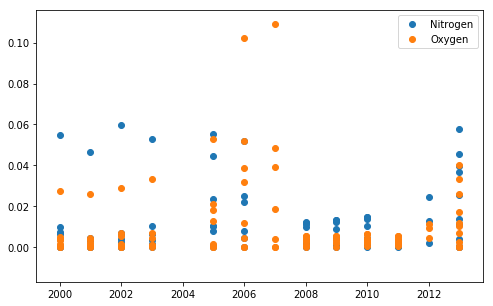

In [33]:
plt.figure(figsize = (8,5))
plt.scatter(df_RO.loc[df_RO.SUBSTANCE == "Nitrogen (N-tot )"].TIME, df_RO.loc[df_RO.SUBSTANCE == "Nitrogen (N-tot )"].Value/df_RO.loc[df_RO.SUBSTANCE == "Nitrogen (N-tot )"].Value.sum())
plt.scatter(df_RO.loc[df_RO.SUBSTANCE == "Biochemical oxygen demand (BOD)"].TIME, df_RO.loc[df_RO.SUBSTANCE == "Biochemical oxygen demand (BOD)"].Value/df_RO.loc[df_RO.SUBSTANCE == "Biochemical oxygen demand (BOD)"].Value.sum())
plt.legend(('Nitrogen', 'Oxygen'))
plt.show()

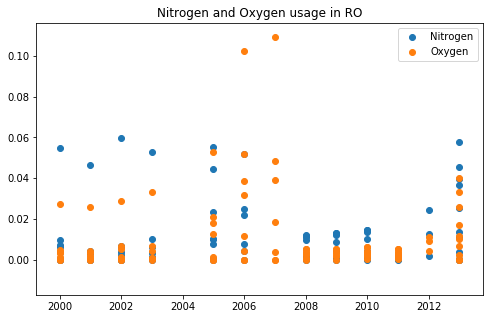

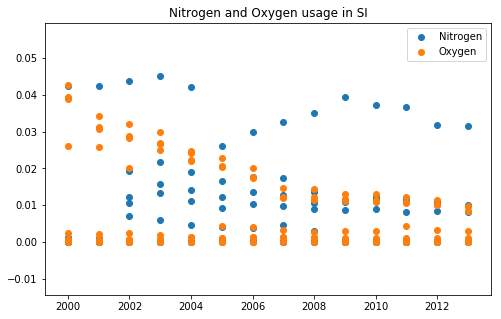

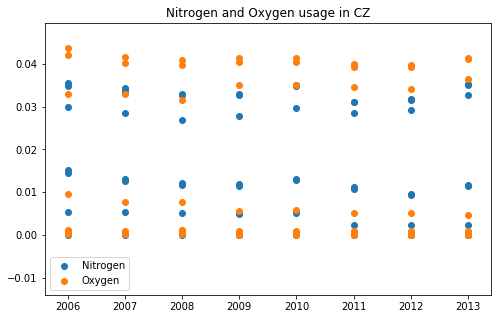

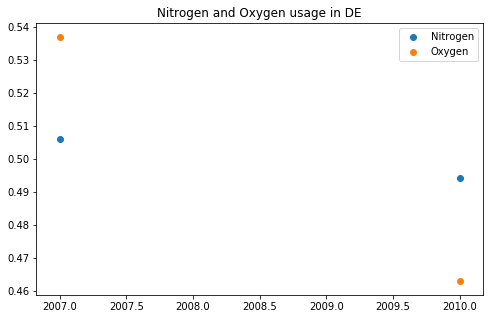

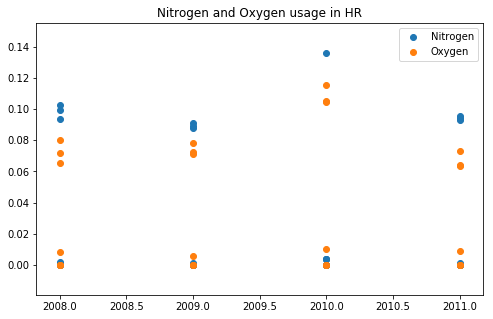

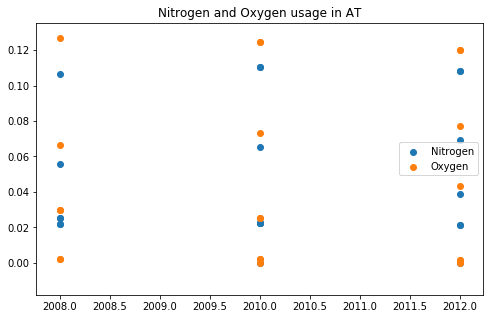

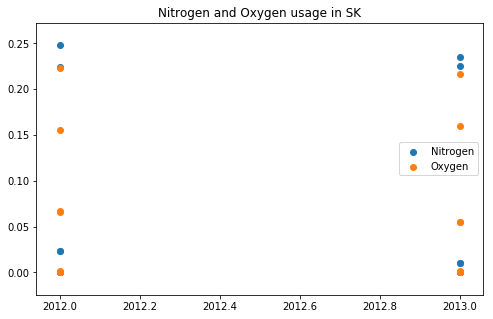

In [72]:
# to work on look into bulgaria
for item in df_dan.RBD.unique():
    z = re.search('[(]([A-Z]+)[)]', item).group(0)
    z = re.search('([A-Z]+)', z).group(0)
    if z not in ['RS', 'BG', 'CH']:
        plt.figure(figsize = (8,5))
        plt.scatter(vars()['df_'+z].loc[vars()['df_'+z].SUBSTANCE == "Nitrogen (N-tot )"].TIME, vars()['df_'+z].loc[vars()['df_'+z].SUBSTANCE == "Nitrogen (N-tot )"].Value/vars()['df_'+z].loc[vars()['df_'+z].SUBSTANCE == "Nitrogen (N-tot )"].Value.sum())
        plt.scatter(vars()['df_'+z].loc[vars()['df_'+z].SUBSTANCE == "Biochemical oxygen demand (BOD)"].TIME, vars()['df_'+z].loc[vars()['df_'+z].SUBSTANCE == "Biochemical oxygen demand (BOD)"].Value/vars()['df_'+z].loc[vars()['df_'+z].SUBSTANCE == "Biochemical oxygen demand (BOD)"].Value.sum())
        plt.legend(('Nitrogen', 'Oxygen'))
        plt.title('Nitrogen and Oxygen usage in ' + z)
        plt.show();

In [28]:
import plotly as py
import plotly.graph_objs as go

In [73]:
countries = ['Bulgaria', 'Romania', 'Slovenia', 'Switzerland', 'Serbia','Czech Republic', 'Germany', 'Croatia', 'Austria', 'Slovakia']
dummy = 0
for item in df_dan.RBD.unique():
    z = re.search('[(]([A-Z]+)[)]', item).group(0)
    z = re.search('([A-Z]+)', z).group(0)
    if dummy == 0:
        names = [z]
    else:
        names += [z]
    dummy += 1

for item in ['RS', 'BG', 'CH']:
    names.remove(item)

In [74]:
# for plh in ['NI', 'O2', 'Vol']:
dummy = 0
for item in names:
    if dummy == 0:
        val_NI = [vars()['df_'+item].loc[(vars()['df_'+item].TIME == 2010) & (vars()['df_'+item].SUBSTANCE == "Nitrogen (N-tot )")].Value.max()]
    else:
        val_NI += [vars()['df_'+item].loc[(vars()['df_'+item].TIME == 2010) & (vars()['df_'+item].SUBSTANCE == "Nitrogen (N-tot )")].Value.max()]
    dummy += 1
        
print(val_NI)

[21.5, 5.2, 18.84, 33.83, 1.047, 122.22, nan]


In [75]:
dummy = 0
for item in names:
    if dummy == 0:
        val_O2 = [vars()['df_'+item].loc[(vars()['df_'+item].TIME == 2010) & (vars()['df_'+item].SUBSTANCE == "Biochemical oxygen demand (BOD)")].Value.max()]
    else:
        val_O2 += [vars()['df_'+item].loc[(vars()['df_'+item].TIME == 2010) & (vars()['df_'+item].SUBSTANCE == "Biochemical oxygen demand (BOD)")].Value.max()]
    dummy += 1
        
print(val_O2)

[51.94, 14.97, 168.22, 810.9, 24.82, 792.58, nan]


In [83]:
dataNI = dict (
    type = 'choropleth',
    locations = ['Romania', 'Slovenia', 'Czech Republic', 'Germany', 'Croatia', 'Austria', 'Slovakia'],
    locationmode='country names',
#   colorscale = [1,2,3],
    z = val_NI
)


lytNI = dict(geo=dict(scope='europe'),
          title = 'NI Concentration in 2010'
          )

dataO2 = dict (
    type = 'choropleth',
    locations = ['Romania', 'Slovenia', 'Czech Republic', 'Germany', 'Croatia', 'Austria', 'Slovakia'],
    locationmode='country names',
#   colorscale = [1,2,3],
    z = val_O2
)


lytO2 = dict(geo=dict(scope='europe'),
            title = 'O2 Usage in 2010'
        )

In [84]:
mapNI = go.Figure(data=[dataNI], layout = lytNI)
mapO2 = go.Figure(data=[dataO2], layout = lytO2)

py.offline.plot(mapNI)

'file:///home/jens/Dokumente/UniversitatPotsdam/HackhPI/dustycrocodile/temp-plot.html'

In [71]:
py.offline.plot(mapO2)

'file:///home/jens/Dokumente/UniversitatPotsdam/HackhPI/dustycrocodile/temp-plot.html'

In [111]:
df_d = pd.read_csv('Danube/water_resources.csv', index_col = [0, 1])

df_d.head()

,,Fresh surface water (Million cubic metres),Fresh groundwater (Million cubic metres)
,ID,,
2000,Switzerland,NaN,NaN
2001,Switzerland,NaN,NaN
2002,Switzerland,NaN,NaN
2003,Switzerland,NaN,NaN
2004,Switzerland,NaN,NaN


In [114]:
df_d.index.get_level_values(0).unique()

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015],
           dtype='int64')

In [116]:
df_d.loc[df_d.index.get_level_values(0) == 2001, 'Fresh surface water (Million cubic metres)']

      ID            
2001  Switzerland          NaN
      Germany              NaN
      Hungary              NaN
      Slovenia             NaN
      Czech Republic       NaN
      Poland               NaN
      Slovakia             NaN
      Romania           2928.0
      Bulgaria             NaN
      Croatia              NaN
Name: Fresh surface water (Million cubic metres), dtype: float64

In [109]:
for year in np.arange(2000,2016):
    vars()['df_d' + str(year)] = df_d[df_d.index.get_level_values(0) == year]

In [132]:
for year in np.arange(2000,2016):
    vars()['data' + str(year)] = dict (
        type = 'choropleth',
        locations = df_d.index.get_level_values('ID').unique(),
        locationmode='country names',
    #   colorscale = [1,2,3],
        z = df_d.loc[df_d.index.get_level_values(0) == year, 'Fresh surface water (Million cubic metres)']
    )
    
    vars()['lyt' + str(year)]= dict(geo=dict(scope='europe'),
            title = 'Fresh surface water (Million cubic metres) in ' + str(year)
        )
    vars()['map' + str(year)] = go.Figure(data=[vars()['data' + str(year)]], layout = vars()['lyt' + str(year)])
    
    py.offline.plot(vars()['map' + str(year)], filename = 'map'+str(year)+'.html')